<a href="https://colab.research.google.com/github/tripti369/Custom-segmentation-/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
customer_segmentation=pd.read_csv("/content/sample_data/customer_support_tickets.csv")

In [ ]:
customer_segmentation.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
customer_segmentation.shape

(8469, 17)

In [ ]:
customer_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
customer_segmentation.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
customer_segmentation.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [ ]:
customer_segmentation.nunique()

,0
Ticket ID,8469
Customer Name,8028
Customer Email,8320
Customer Age,53
Customer Gender,3
Product Purchased,42
Date of Purchase,730
Ticket Type,5
Ticket Subject,16
Ticket Description,8077


In [ ]:
customer_segmentation.duplicated().sum()

np.int64(0)

In [ ]:
customer_segmentation.dtypes

,0
Ticket ID,int64
Customer Name,object
Customer Email,object
Customer Age,int64
Customer Gender,object
Product Purchased,object
Date of Purchase,object
Ticket Type,object
Ticket Subject,object
Ticket Description,object


In [ ]:
# to remove all missing values
customer_segmentation.dropna(inplace=True)

In [ ]:
customer_segmentation.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
customer_segmentation.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [ ]:
df=customer_segmentation

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])
numeric_df.head()

,Ticket ID,Customer Age,Customer Satisfaction Rating
2,3,48,3.0
3,4,27,3.0
4,5,67,1.0
10,11,48,1.0
11,12,51,1.0


In [ ]:
customer_segmentation


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0


In [ ]:
customer_segmentation.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
numeric_columns = [
    'Customer Age',
    'First Response Time',
    'Time to Resolution',
    'Customer Satisfaction Rating'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_df = df[numeric_columns]


In [ ]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,NaN,NaN,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,NaN,NaN,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,NaN,NaN,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,NaN,NaN,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,NaN,NaN,3.0
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,NaN,NaN,5.0
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,NaN,NaN,1.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,NaN,NaN,3.0


In [ ]:
df.dtypes

,0
Ticket ID,int64
Customer Name,object
Customer Email,object
Customer Age,int64
Customer Gender,object
Product Purchased,object
Date of Purchase,object
Ticket Type,object
Ticket Subject,object
Ticket Description,object


In [ ]:
numeric_columns = [
    'Customer Age',
    'First Response Time',
    'Time to Resolution',
    'Customer Satisfaction Rating'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_df = df[numeric_columns]


In [ ]:
df.dtypes

,0
Ticket ID,int64
Customer Name,object
Customer Email,object
Customer Age,int64
Customer Gender,object
Product Purchased,object
Date of Purchase,object
Ticket Type,object
Ticket Subject,object
Ticket Description,object


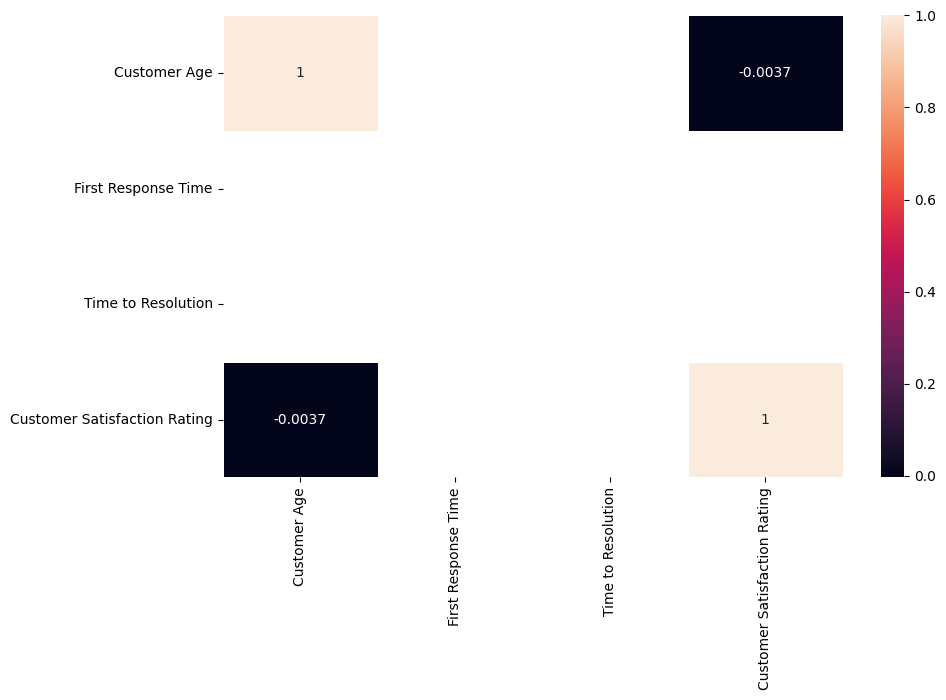

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.5)
plt.show()


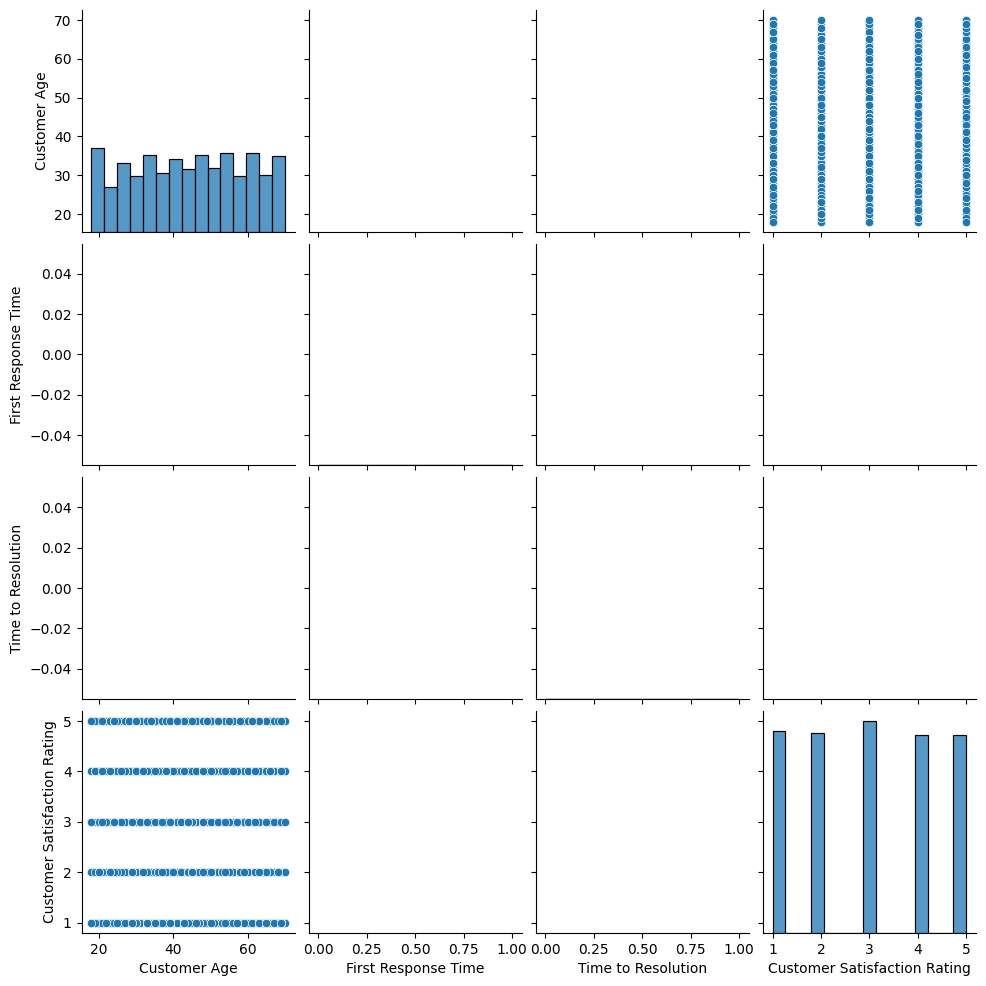

In [ ]:
sns.pairplot(numeric_df)
plt.show()


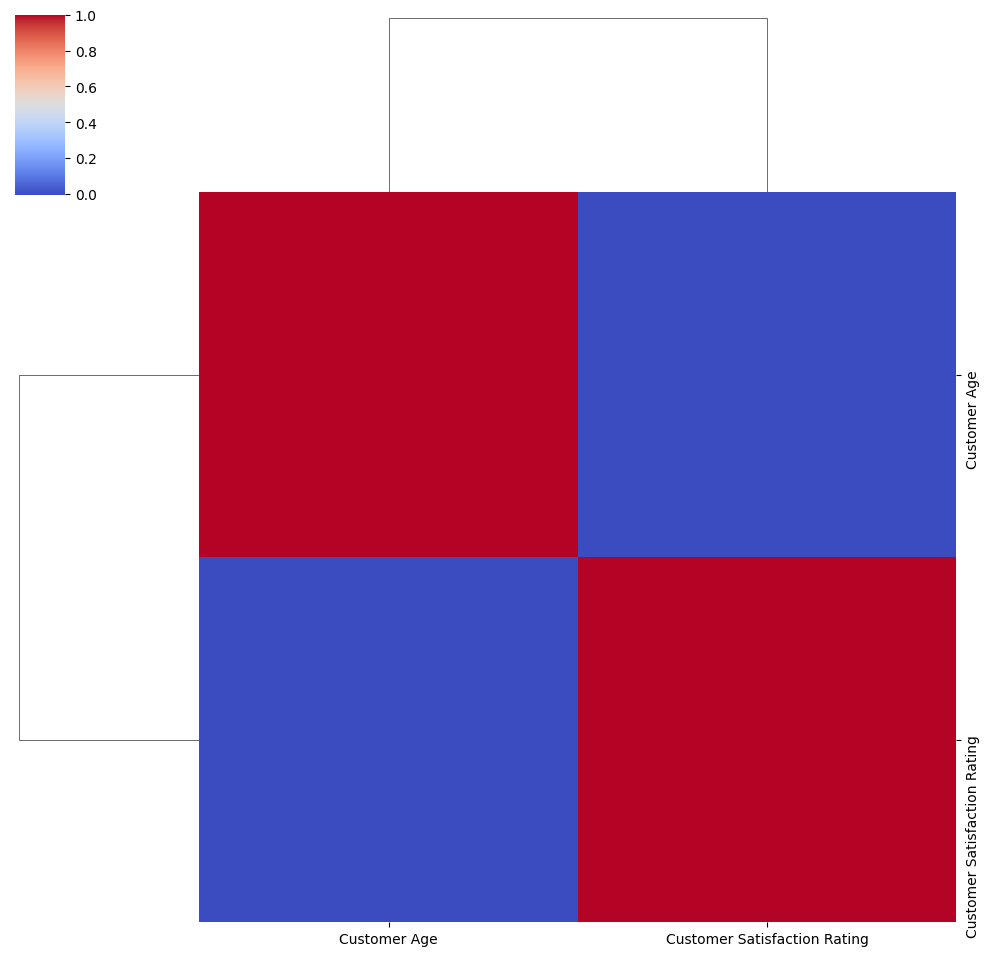

In [ ]:
valid_numeric_df = numeric_df[['Customer Age', 'Customer Satisfaction Rating']]

sns.clustermap(valid_numeric_df.corr(), cmap='coolwarm')
plt.show()


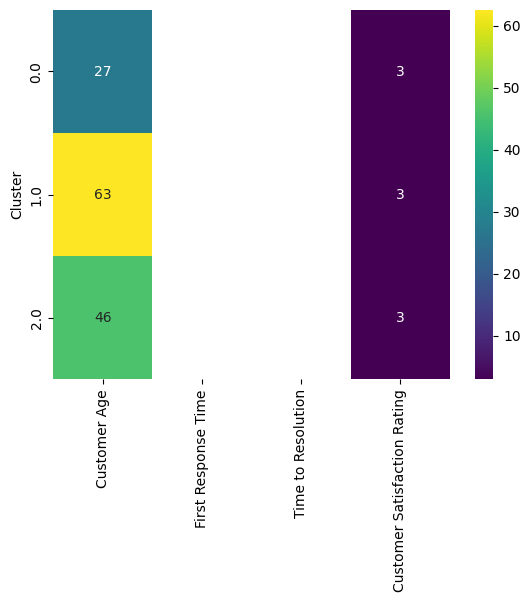

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(valid_numeric_df)
df.loc[valid_numeric_df.index, 'Cluster'] = kmeans.labels_

cluster_mean = df.groupby('Cluster')[numeric_columns].mean()

sns.heatmap(cluster_mean, annot=True, cmap='viridis')
plt.show()

In [ ]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(numeric_df))
outliers = numeric_df[(z > 3).any(axis=1)]
outliers
print("Number of outliers:", len(outliers))

Number of outliers: 0


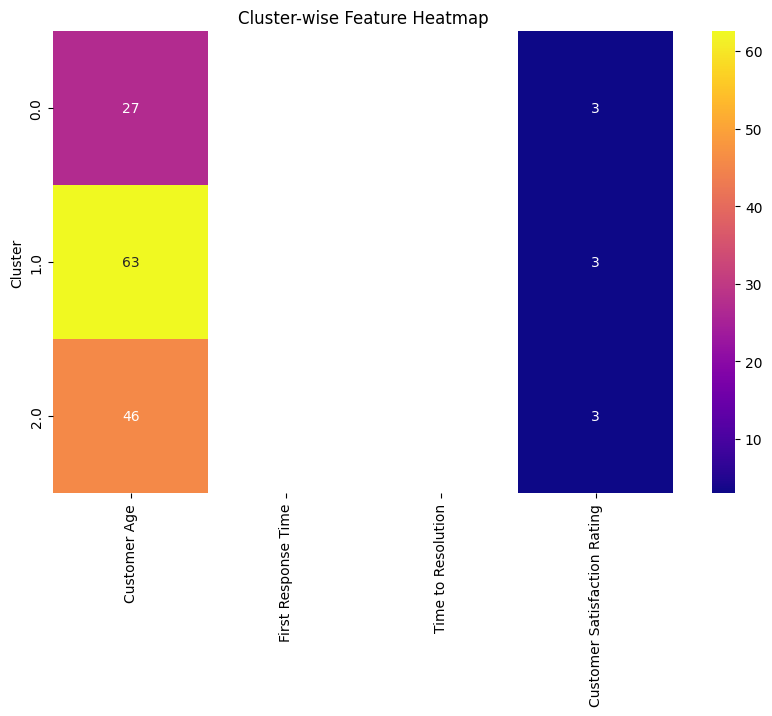

In [ ]:
cluster_summary = df.groupby("Cluster")[numeric_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="plasma")
plt.title("Cluster-wise Feature Heatmap")
plt.show()

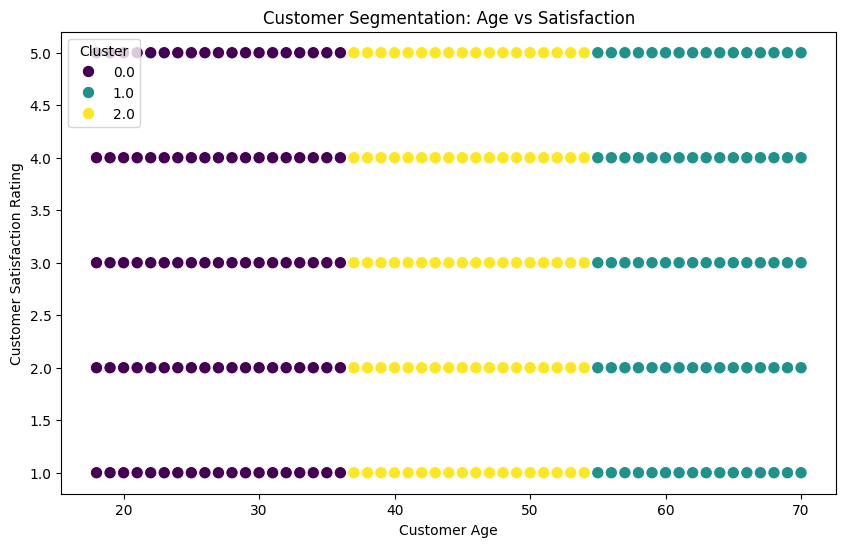

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Customer Age"],
    y=df["Customer Satisfaction Rating"],
    hue=df["Cluster"],
    palette="viridis",
    s=80
)
plt.title("Customer Segmentation: Age vs Satisfaction")
plt.show()


In [ ]:
print("\nFINAL CLUSTER SUMMARY:\n")
print(cluster_mean)


FINAL CLUSTER SUMMARY:

         Customer Age  First Response Time  Time to Resolution  \
Cluster                                                          
0.0         27.067638                  NaN                 NaN   
1.0         62.532297                  NaN                 NaN   
2.0         45.752058                  NaN                 NaN   

         Customer Satisfaction Rating  
Cluster                                
0.0                          2.997919  
1.0                          2.964115  
2.0                          3.008230  


In [ ]:
outliers.sum()

,0
Customer Age,0.0
First Response Time,0.0
Time to Resolution,0.0
Customer Satisfaction Rating,0.0


In [ ]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Cluster'],
      dtype='object')

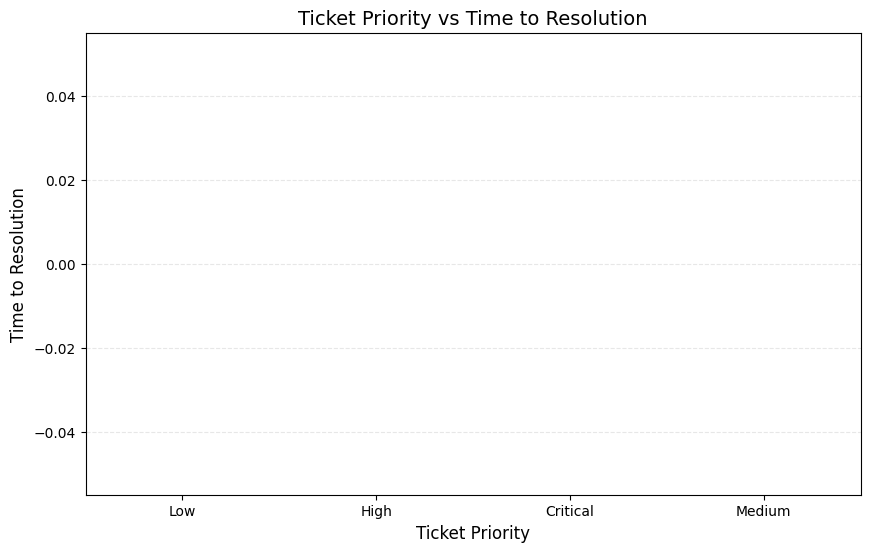

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Ticket Priority', y='Time to Resolution')

plt.title('Ticket Priority vs Time to Resolution', fontsize=14)
plt.xlabel('Ticket Priority', fontsize=12)
plt.ylabel('Time to Resolution', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


/tmp/ipython-input-2331476012.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Ticket Channel'], y=df['Customer Satisfaction Rating'], estimator=np.mean, ci=None, palette='cool')
/tmp/ipython-input-2331476012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Ticket Channel'], y=df['Customer Satisfaction Rating'], estimator=np.mean, ci=None, palette='cool')


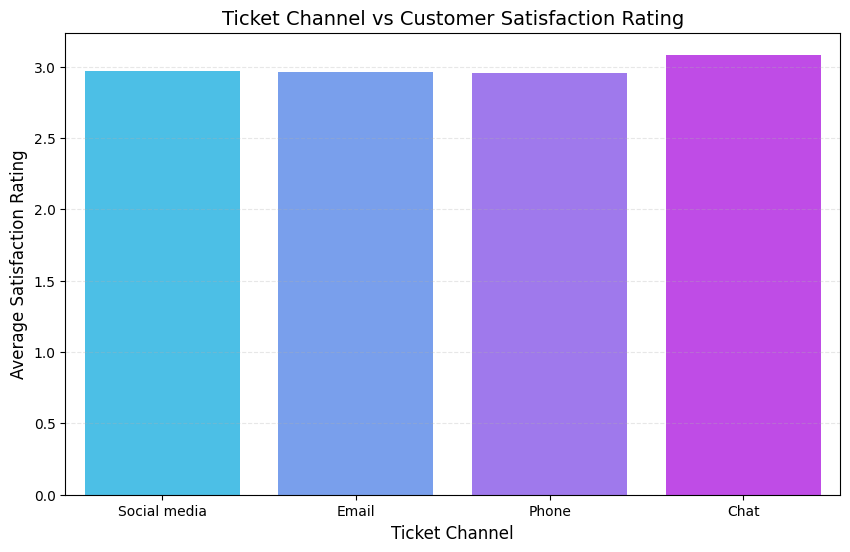


Insight:
This graph shows which support channel gives the best customer satisfaction.
It helps understand whether Email, Chat, Phone or other channels are performing better.


<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Ticket Channel'], y=df['Customer Satisfaction Rating'], estimator=np.mean, ci=None, palette='cool')

plt.title('Ticket Channel vs Customer Satisfaction Rating', fontsize=14)
plt.xlabel('Ticket Channel', fontsize=12)
plt.ylabel('Average Satisfaction Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Insight
print("\nInsight:")
print("This graph shows which support channel gives the best customer satisfaction.")
print("It helps understand whether Email, Chat, Phone or other channels are performing better.")
plt.show